In [73]:
#dependencies
import numpy as np#for arrays
import pandas as pd#for data
import seaborn as sns#for plotting and visualisation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Collection and Processing**

In [74]:
df=pd.read_csv('/content/dataset.csv')

In [75]:
type(df)

pandas.core.frame.DataFrame

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [77]:
df.shape

(381, 13)

In [78]:
#statistical view
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [79]:
#number of missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [80]:
#drop the missing values
df=df.dropna()
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [81]:
df.replace({'N': 0, 'Y': 1}, inplace=True)


/tmp/ipython-input-1314744413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'N': 0, 'Y': 1}, inplace=True)


In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [83]:
#dependent value
df['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [84]:
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [85]:
df['Dependents'] = df['Dependents'].replace('+3', 4)



In [86]:
df['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


***Data visualisation***

<Axes: xlabel='Education', ylabel='count'>

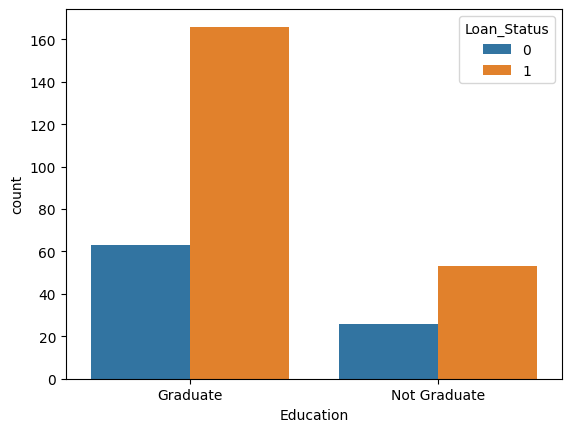

In [87]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

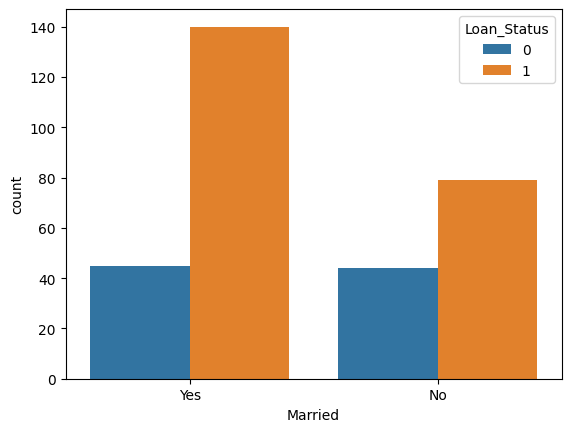

In [88]:
#marital status and loan_status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

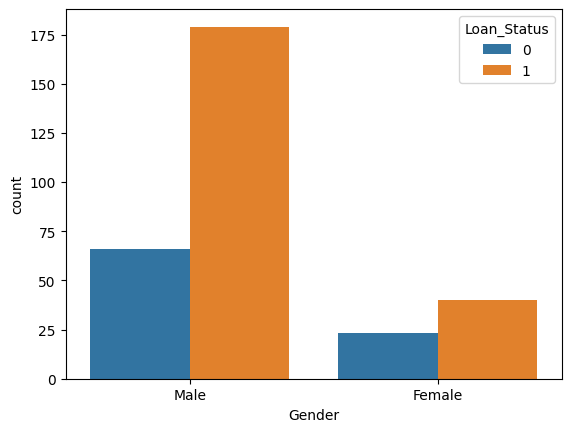

In [89]:
#gender and loan_status
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

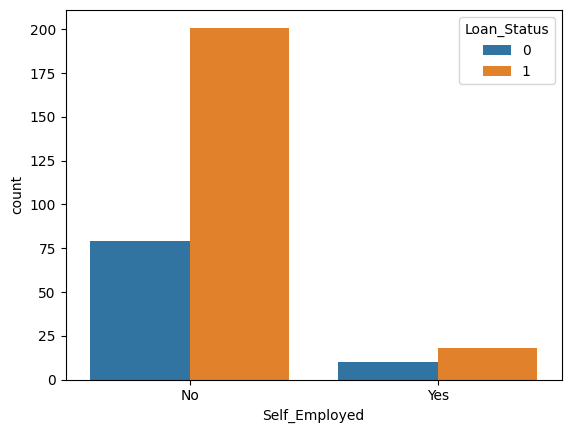

In [90]:
#self_employeed and loan_status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

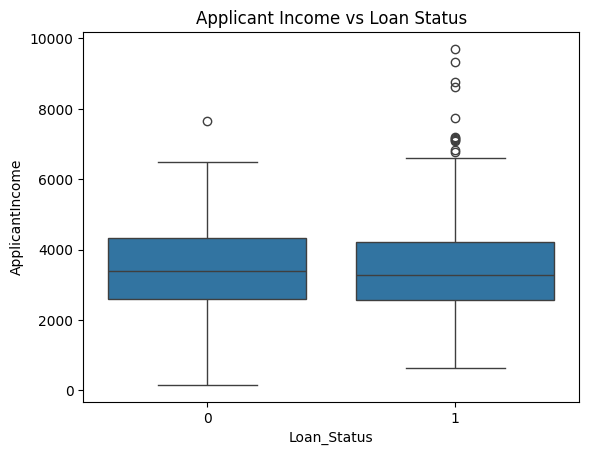

In [126]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()


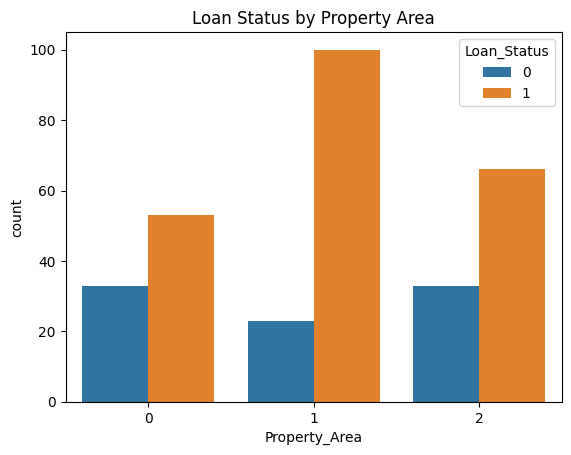

In [127]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.show()


In [91]:
#convert the categorical column to numerical value
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/tmp/ipython-input-2442526109.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [92]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [107]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)


In [108]:
#separarting data and label
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [109]:
print(X)

     Gender  Married  ...  Credit_History  Property_Area
0         1        1  ...             1.0              0
1         1        1  ...             1.0              2
2         1        1  ...             1.0              2
3         1        0  ...             1.0              2
4         1        1  ...             1.0              2
..      ...      ...  ...             ...            ...
376       1        1  ...             1.0              2
377       1        1  ...             1.0              0
378       0        0  ...             1.0              0
379       1        1  ...             1.0              0
380       0        0  ...             0.0              1

[308 rows x 11 columns]


In [110]:
print(Y)

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 308, dtype: int64


**Train Test Split**

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)#stratify for equal label distribution

In [112]:
X_train.shape

(277, 11)

In [113]:
X_test.shape

(31, 11)

In [114]:
X.shape

(308, 11)

**Training the model**

In [115]:
model=svm.SVC(kernel='linear')

In [116]:
#training the svm model
model.fit(X_train,Y_train)

SVC(kernel='linear')

**Model evaluation**

In [117]:
#accuracy of the training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [122]:
print('Accuracy score of the training data :',training_data_accuracy)

Accuracy score of the training data : 0.8303249097472925


In [119]:
#accuracy on the testing data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [123]:
print('Accuracy score of testing data :',testing_data_accuracy)

Accuracy score of testing data : 0.8064516129032258


**Make a predictive system**

In [125]:
sample = pd.DataFrame([{
    'Gender': 1, 'Married': 1, 'Dependents': 0, 'Education': 0,
    'Self_Employed': 0, 'ApplicantIncome': 5000, 'CoapplicantIncome': 0,
    'LoanAmount': 150, 'Loan_Amount_Term': 360, 'Credit_History': 1,
    'Property_Area': 2
}])

prediction = model.predict(sample)
print("Loan Approved" if prediction[0] == 1 else "Loan Denied")



Loan Approved
